In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os

In [2]:
train_data_dir = os.path.join(os.getcwd(), 'train')
test_data_dir = os.path.join(os.getcwd(), 'test')

num_classes = 7
img_rows, img_cols = 48, 48
batch_size = 32

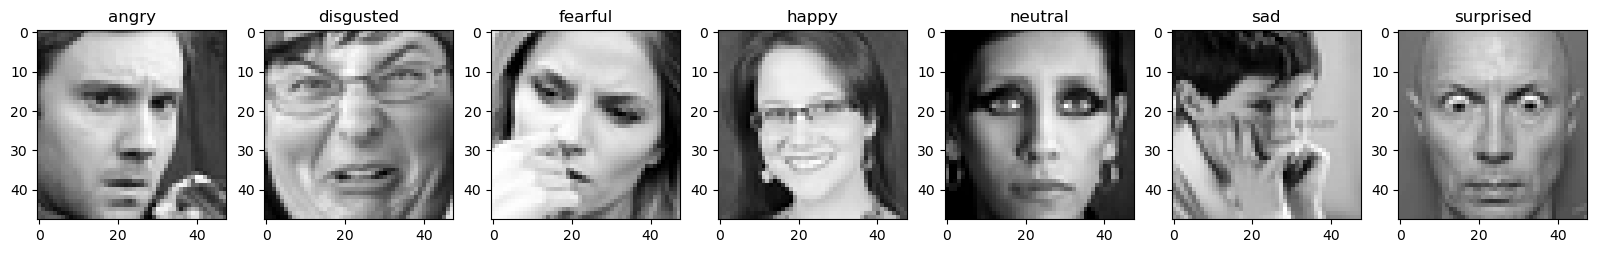

In [13]:
from PIL import Image

target_var = os.listdir(train_data_dir)
fig, axes = plt.subplots(1, 7, figsize=(20,8))
for i in range(len(target_var)):
    img_path = os.path.join(train_data_dir, target_var[i], os.listdir(os.path.join(train_data_dir, target_var[i]))[0])
    img = Image.open(img_path)
    axes[i].imshow(img, cmap='gray')
    axes[i].set_title(target_var[i])
plt.show()

In [3]:
import tensorflow
from tensorflow import keras
# from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

ImageDataGenerator = keras.preprocessing.image.ImageDataGenerator

In [4]:
datagen_train = ImageDataGenerator(
                rescale = 1./255,
                rotation_range=30,
                shear_range=0.3,
                zoom_range=0.3,
                width_shift_range=0.4,
                height_shift_range=0.4,
                horizontal_flip=True,
                fill_mode='nearest'
)

datagen_test = ImageDataGenerator(
                rescale = 1./255
)

train_set = datagen_train.flow_from_directory(
                train_data_dir,
                color_mode = 'grayscale',
                target_size = (img_rows, img_cols),
                batch_size = batch_size,
                class_mode = 'categorical',
                shuffle = True
)

test_set = datagen_test.flow_from_directory(
                test_data_dir,
                color_mode = 'grayscale',
                target_size = (img_rows, img_cols),
                batch_size = batch_size,
                class_mode = 'categorical',
                shuffle = True
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
model = Sequential()

# Block-1
model.add(Conv2D(32,(3,3),padding = 'same',kernel_initializer = 'he_normal',input_shape = (img_rows,img_cols,1)))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding = 'same',kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

# Block-2
model.add(Conv2D(64,(3,3),padding = 'same',kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding = 'same',kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

# Block-3
model.add(Conv2D(128,(3,3),padding = 'same',kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding = 'same',kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

# Block-4
model.add(Conv2D(256,(3,3),padding = 'same',kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding = 'same',kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

# Block-5
model.add(Flatten())
model.add(Dense(64,kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-6
model.add(Dense(64,kernel_initializer = 'he_normal'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

# Block-7
model.add(Dense(num_classes,kernel_initializer = 'he_normal'))
model.add(Activation('softmax'))

C:\ProgramData\anaconda3\envs\emotion-detection\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━┓
┃ Layer (type)           ┃ Output Shape    ┃   Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━┩
│ conv2d (Conv2D)        │ (None, 48, 48,  │       320 │
│                        │ 32)             │           │
├────────────────────────┼─────────────────┼───────────┤
│ activation             │ (None, 48, 48,  │         0 │
│ (Activation)           │ 32)             │           │
├────────────────────────┼─────────────────┼───────────┤
│ batch_normalization    │ (None, 48, 48,  │       128 │
│ (BatchNormalization)   │ 32)             │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv2d_1 (Conv2D)      │ (None, 48, 48,  │     9,248 │
│                        │ 32)             │           │
├────────────────────────┼─────────────────┼───────────┤
│ activation_1           │ (None, 48, 48,  │         0 │
│ (Activation)           │ 32)             │           │
├────────────────────────┼─────────────────┼───────────┤
│ batch_normalization_1  │ (None, 48, 48,  │       128 │
│ (BatchNormalization)   │ 32)             │           │
├────────────────────────┼─────────────────┼───────────┤
│ max_pooling2d          │ (None, 24, 24,  │         0 │
│ (MaxPooling2D)         │ 32)             │           │
├────────────────────────┼─────────────────┼───────────┤
│ dropout (Dropout)      │ (None, 24, 24,  │         0 │
│                        │ 32)             │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv2d_2 (Conv2D)      │ (None, 24, 24,  │    18,496 │
│                        │ 64)             │           │
├────────────────────────┼─────────────────┼───────────┤
│ activation_2           │ (None, 24, 24,  │         0 │
│ (Activation)           │ 64)             │           │
├────────────────────────┼─────────────────┼───────────┤
│ batch_normalization_2  │ (None, 24, 24,  │       256 │
│ (BatchNormalization)   │ 64)             │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv2d_3 (Conv2D)      │ (None, 24, 24,  │    36,928 │
│                        │ 64)             │           │
├────────────────────────┼─────────────────┼───────────┤
│ activation_3           │ (None, 24, 24,  │         0 │
│ (Activation)           │ 64)             │           │
├────────────────────────┼─────────────────┼───────────┤
│ batch_normalization_3  │ (None, 24, 24,  │       256 │
│ (BatchNormalization)   │ 64)             │           │
├────────────────────────┼─────────────────┼───────────┤
│ max_pooling2d_1        │ (None, 12, 12,  │         0 │
│ (MaxPooling2D)         │ 64)             │           │
├────────────────────────┼─────────────────┼───────────┤
│ dropout_1 (Dropout)    │ (None, 12, 12,  │         0 │
│                        │ 64)             │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv2d_4 (Conv2D)      │ (None, 12, 12,  │    73,856 │
│                        │ 128)            │           │
├────────────────────────┼─────────────────┼───────────┤
│ activation_4           │ (None, 12, 12,  │         0 │
│ (Activation)           │ 128)            │           │
├────────────────────────┼─────────────────┼───────────┤
│ batch_normalization_4  │ (None, 12, 12,  │       512 │
│ (BatchNormalization)   │ 128)            │           │
├────────────────────────┼─────────────────┼───────────┤
│ conv2d_5 (Conv2D)      │ (None, 12, 12,  │   147,584 │
│                        │ 128)            │           │
├────────────────────────┼─────────────────┼───────────┤
│ activation_5           │ (None, 12, 12,  │         0 │
│ (Activation)           │ 128)            │           │
├────────────────────────┼─────────────────┼───────────┤
│ batch_normalization_5  │ (None, 12, 12,  │       512 │
│ (BatchNormalization)   │ 128)            │           │
├────────────────────────┼─────────────────┼───────────┤
│ max_pooling2d_2        │ (None, 6, 6,    │         0 │
│ (MaxPool

 Total params: 1,328,167 (5.07 MB)

 Trainable params: 1,325,991 (5.06 MB)

 Non-trainable params: 2,176 (8.50 KB)

None


In [11]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

early_stopping = EarlyStopping(monitor = 'val_loss',
                           min_delta = 0,
                           patience = 3,
                           verbose = 1,
                           restore_best_weights = True)

checkpoint = ModelCheckpoint(filepath = 'model_emotion.keras',
                             monitor = 'val_accuracy',
                             mode = 'max',
                             save_best_only = True,
                             verbose = 1)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.2,
                              patience = 3,
                              verbose = 1,
                              min_delta = 0.0001)

callbacks_list = [early_stopping, checkpoint, reduce_lr]

model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(learning_rate = 0.001),
              metrics = ['accuracy'])

epochs = 48

history = model.fit(
    train_set,
    # steps_per_epoch = train_set.n // train_set.batch_size,
    epochs = epochs,
    validation_data = test_set,
    # validation_steps = test_set.n // test_set.batch_size,
    callbacks = callbacks_list
)

Epoch 1/48


C:\ProgramData\anaconda3\envs\emotion-detection\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.1684 - loss: 2.4696  
Epoch 1: val_accuracy improved from -inf to 0.24659, saving model to model_emotion.keras
898/898 ━━━━━━━━━━━━━━━━━━━━ 187s 202ms/step - accuracy: 0.1684 - loss: 2.4692 - val_accuracy: 0.2466 - val_loss: 1.7863 - learning_rate: 0.0010
Epoch 2/48
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.2269 - loss: 1.8425  
Epoch 2: val_accuracy did not improve from 0.24659
898/898 ━━━━━━━━━━━━━━━━━━━━ 168s 164ms/step - accuracy: 0.2270 - loss: 1.8424 - val_accuracy: 0.2431 - val_loss: 1.7837 - learning_rate: 0.0010
Epoch 3/48
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step - accuracy: 0.2480 - loss: 1.8017  
Epoch 3: val_accuracy did not improve from 0.24659
898/898 ━━━━━━━━━━━━━━━━━━━━ 158s 175ms/step - accuracy: 0.2480 - loss: 1.8017 - val_accuracy: 0.2198 - val_loss: 1.8854 - learning_rate: 0.0010
Epoch 4/48
898/898 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step - accuracy: 0.2607 - loss: 1.7737  
Epoch 4: val_accuracy imp

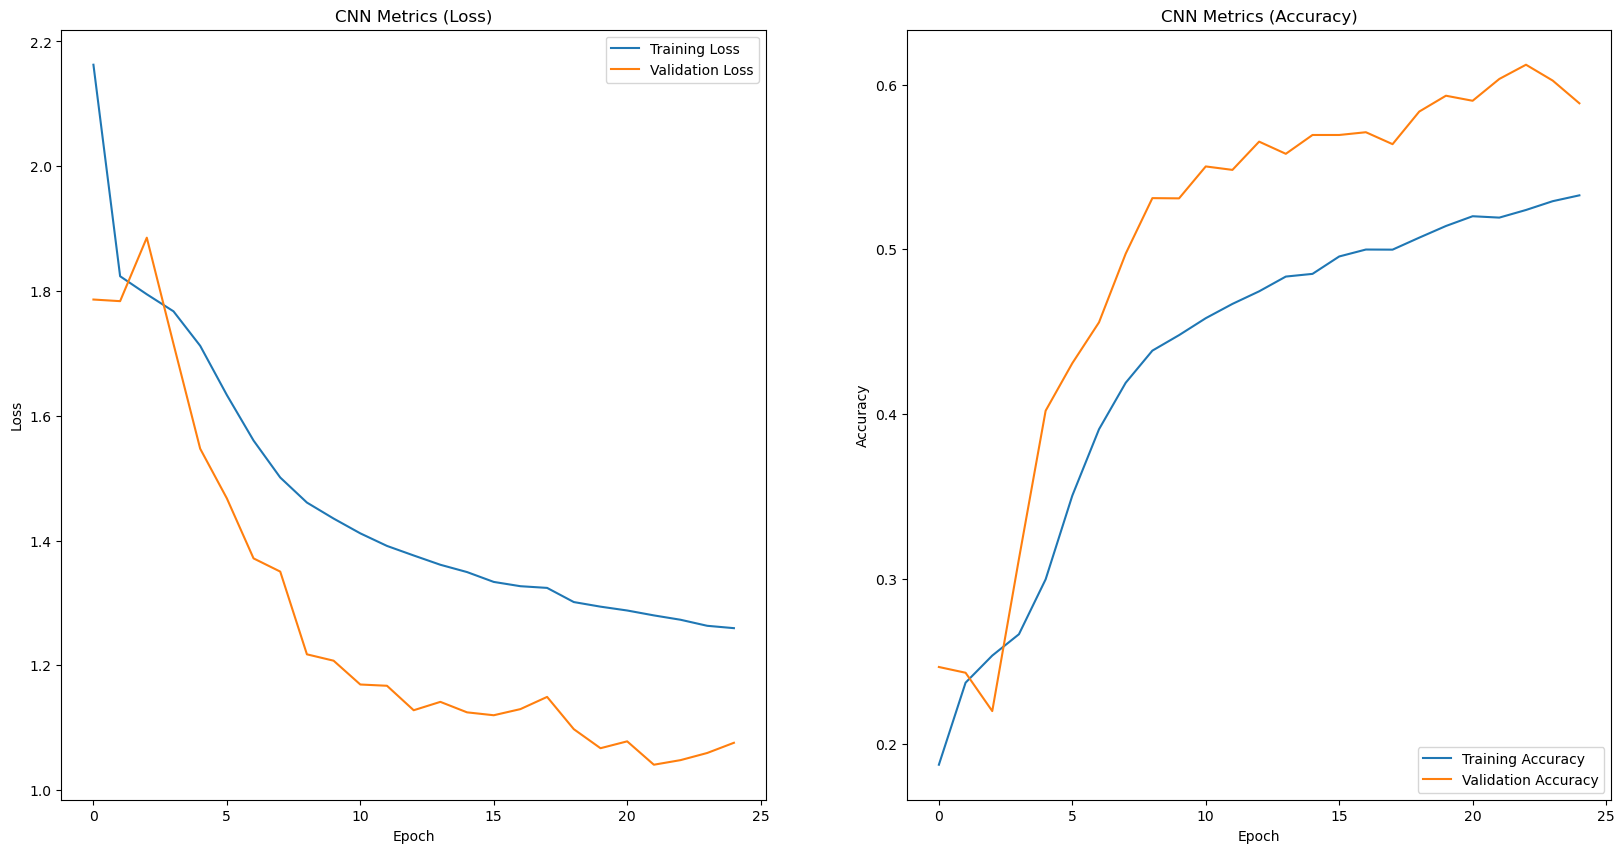

In [15]:
plt.figure(figsize = (20, 10))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('CNN Metrics (Loss)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc="upper right")

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('CNN Metrics (Accuracy)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc="lower right")

plt.show()

In [24]:
best_val_acc = max(history.history['val_accuracy'])
best_val_epoch = history.history['val_accuracy'].index(best_val_acc) + 1

print(f"Best Validation Accuracy: {best_val_acc:.4f} at Epoch {best_val_epoch}")

Best Validation Accuracy: 0.6120 at Epoch 23
